# Implementing a one-layer Neural Network


We will illustrate how to create a one hidden layer NN

We will use the iris data for this exercise

We will build a one-hidden layer neural network  to predict the fourth attribute, Petal Width from the other three (Sepal length, Sepal width, Petal length).

In [1]:
# 引用套件
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [2]:
# tensorflow 在生產環境下，需要將 default graph 重新初始化，以保證內存中沒有其他的 Graph
# 或者是用在每個session之後清理相應的 graph
ops.reset_default_graph()

In [3]:
iris = datasets.load_iris()

#將每個iris.data中的資料取陣列中第0個到第2個值做為x_vals
x_vals = np.array([x[0:3] for x in iris.data])
#將每個iris.data中的資料取陣列中第3個值做為y_vals
y_vals = np.array([x[3] for x in iris.data])

In [4]:
# Create graph session 
sess = tf.Session()

In [5]:
# make results reproducible
#設置seed增加隨機性
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)  

In [6]:
# Split data into train/test = 80%/20%

# train_indices為從0-len(x_vals)的陣列中取出其中80%的值
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
print(train_indices)

# test_indices為剩下20%的值
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
print(test_indices)

#拿train_indices(索引)取出做為train data的x_vals與y_vals，
x_vals_train = x_vals[train_indices]
y_vals_train = y_vals[train_indices]

#拿test_indices取出做為test data的x_vals與y_vals
x_vals_test = x_vals[test_indices]
y_vals_test = y_vals[test_indices]

[  6   3 113  12  24 129  25 108 128  45  48  42  35   5  85  54  41  96
 144  89  77  74 115  94  87  29   2 127  44 125 126  23  64 117  84  14
 132  91  53 141  78  97 143  93  11 134  28  65   0  27  36 106 148 131
  20 140 136 105 119  13  30 101  99  59 135 123  71  21  55  16 114  92
  98  18  81  61  86 122   1  56  19  82 120   9  60  34  40  10 112 100
  26  32 146 118  62 109  57  73 147  17 130 149 111   8 121  39  49  79
 139  90 133  50  76 110  52  80  66 138  83 142]
[  4   7 137  15 145  22  31  33  37  38  43  46  47  51  58  63  67  68
  69  70  72  75  88  95 102 103 104 107 116 124]


In [7]:
# Normalize by column (min-max norm)
# 使結果落在0-1之間
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

#對x_vals_train,x_vals_test中的值做 min-max normalization 
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
print("x_vals_train")
print(x_vals_train)
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))
print("x_vals_test")
print(x_vals_test)

x_vals_train
[[ 0.08333333  0.66666667  0.05172414]
 [ 0.08333333  0.52380952  0.06896552]
 [ 0.38888889  0.23809524  0.67241379]
 [ 0.13888889  0.47619048  0.05172414]
 [ 0.13888889  0.66666667  0.13793103]
 [ 0.80555556  0.47619048  0.81034483]
 [ 0.19444444  0.47619048  0.0862069 ]
 [ 0.66666667  0.23809524  0.81034483]
 [ 0.58333333  0.38095238  0.77586207]
 [ 0.13888889  0.47619048  0.05172414]
 [ 0.27777778  0.80952381  0.06896552]
 [ 0.02777778  0.57142857  0.03448276]
 [ 0.19444444  0.57142857  0.01724138]
 [ 0.30555556  0.9047619   0.10344828]
 [ 0.47222222  0.66666667  0.5862069 ]
 [ 0.61111111  0.38095238  0.60344828]
 [ 0.05555556  0.14285714  0.03448276]
 [ 0.38888889  0.42857143  0.53448276]
 [ 0.66666667  0.61904762  0.79310345]
 [ 0.33333333  0.23809524  0.5       ]
 [ 0.66666667  0.47619048  0.67241379]
 [ 0.58333333  0.42857143  0.55172414]
 [ 0.58333333  0.57142857  0.72413793]
 [ 0.36111111  0.33333333  0.53448276]
 [ 0.55555556  0.14285714  0.56896552]
 [ 0.1111111

In [8]:
# Initialize placeholders
with tf.name_scope('Inputs'):
    # Declare batch size
    batch_size = 50
    x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32,name="x_data")
    y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32,name="y_target")
    # Create variables for both NN layers
    hidden_layer_nodes = 10
    # hidden_layer_nodes = 10
    A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]),name="A1") # inputs -> hidden nodes
    b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]),name="b1")   # one biases for each hidden node
    A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1]),name="A2") # hidden inputs -> 1 output
    b2 = tf.Variable(tf.random_normal(shape=[1]),name="b2")   # one bias for the output

In [9]:
with tf.name_scope('Hidden_layer'):
    # Declare model operations
    # hidden_nodes = relu(x_data*A1+b1)
    # size: x_data:50*3(50列3欄) A1:3*5 b1:1*5
    hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))

with tf.name_scope('Output_layer'):
    # final_output = relu(hidden_nodes*A2+b2)
    # size: hidden_output:50*5 A1:5*1 b2:1*1
    final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))
with tf.name_scope('Loss'):
    # Declare loss function (MSE)
    loss = tf.reduce_mean(tf.square(y_target - final_output))
    tf.summary.scalar('SS', loss)


with tf.name_scope('Train'):
    # Declare optimizer
    my_opt = tf.train.GradientDescentOptimizer(0.005)
    train_step = my_opt.minimize(loss)

In [10]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

merged = tf.summary.merge_all()
writer = tf.summary.FileWriter("SingleHiddenLayer/", graph = sess.graph)

# Training loop
loss_vec = []
test_loss = []
for i in range(500):
    
    # Now we run the training step
    # First we select a random set of indices for the batch.
    # We then select the training values
    # help tips
    #print(y_vals_train[rand_index])
    #print(rand_x.shape)
    #print(rand_y.shape)
    
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    
    if (i+1)%50==0:
        # print(sess.run(A1, feed_dict={x_data: rand_x, y_target: rand_y}))
        print("Training...")
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))
        sresult = sess.run(merged, feed_dict={x_data: rand_x, y_target: rand_y})
        writer.add_summary(sresult, i)

Training...
Generation: 50. Loss = 0.527901
Training...
Generation: 100. Loss = 0.228715
Training...
Generation: 150. Loss = 0.179773
Training...
Generation: 200. Loss = 0.107899
Training...
Generation: 250. Loss = 0.240029
Training...
Generation: 300. Loss = 0.15324
Training...
Generation: 350. Loss = 0.165901
Training...
Generation: 400. Loss = 0.0957248
Training...
Generation: 450. Loss = 0.121014
Training...
Generation: 500. Loss = 0.129494


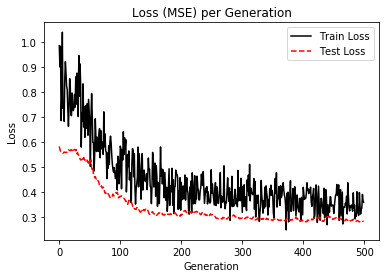

In [11]:
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()